In [2]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append(os.path.abspath('..'))

import torch
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../plotting/style_sheet.mplstyle')
from synthetic_data.dataset import Dataset
from plotting import plotting_utils
import sklearn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

from toy_rnn.rnn import BidirectionalLSTM

In [3]:
dataset = Dataset(
    num_sets=2,
    num_neurons=100,
    latent_dim=2,
    latent_timescale=0.1,
    dt=0.01,
    max_firing_rate=100.0,
    trial_duration=2.0,
)

In [4]:
# Get a batch of data 
data_iter = iter(dataset)
batch = next(data_iter)
time, latents, spike_counts = batch['time'], batch['latents'], batch['spike_counts']

In [5]:
# Calcualte PCs of spike counts
N_PCS = 2
pca = PCA(n_components=N_PCS)
spike_counts_centered = spike_counts - spike_counts.mean(dim=0, keepdim=True)
pcs = pca.fit_transform(spike_counts_centered.numpy())
reg = LinearRegression(fit_intercept=False).fit(pcs, latents.numpy()[:, :N_PCS])
pcs_aligned = reg.predict(pcs)
pcs = pcs_aligned

# Calculate variance explained
r_sq = sklearn.metrics.r2_score(latents.numpy()[:, :N_PCS], pcs)
print(f'Variance explained by first {N_PCS} PCs: {r_sq:.3f}')

Variance explained by first 2 PCs: 0.840


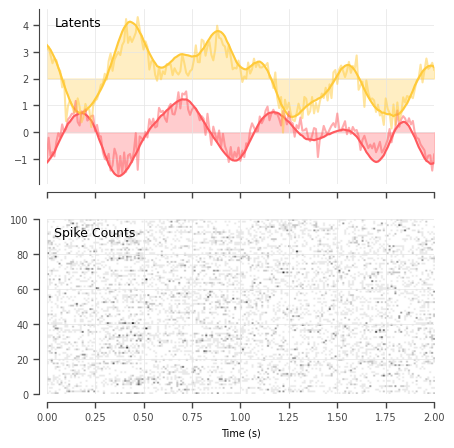

In [10]:
# Plot latents and alinged-spike-count PCs
fig, ax = plt.subplots(2,1, figsize=(5,5), sharex=True)
for l in range(latents.shape[1]):
    line = ax[0].plot(time, 2*l + latents[:, l])
    ax[0].fill_between(time, 2*l + latents[:, l], 2*l, alpha=0.3, color = line[0].get_color())
ax[0].text(0.02, 0.9, "Latents", transform=ax[0].transAxes)
ax[0].set_prop_cycle(None)  # reset color cycle
for l in range(pcs.shape[1]):
    ax[0].plot(time, 2*l + pcs[:, l], alpha=0.5)

# Plot spike counts
ax[1].imshow(spike_counts.T, aspect='auto', cmap='Greys', origin='lower', extent=[time[0], time[-1], 0, spike_counts.shape[1]])
ax[1].text(0.02, 0.9, "Spike Counts", transform=ax[1].transAxes)
ax[1].set_xlabel("Time (s)")

plotting_utils.outset_axes(ax[0])
plotting_utils.outset_axes(ax[1])


In [ ]:
ax[0].set

AttributeError: 'Axes' object has no attribute 'get_prop_cycle'

In [10]:
bdlstm = BidirectionalLSTM(input_size=101, hidden_size=50, num_layers=1)

In [11]:
for name, param in bdlstm.named_parameters():
    print(name, param.shape)

lstm.weight_ih_l0 torch.Size([200, 101])
lstm.weight_hh_l0 torch.Size([200, 50])
lstm.bias_ih_l0 torch.Size([200])
lstm.bias_hh_l0 torch.Size([200])
lstm.weight_ih_l0_reverse torch.Size([200, 101])
lstm.weight_hh_l0_reverse torch.Size([200, 50])
lstm.bias_ih_l0_reverse torch.Size([200])
lstm.bias_hh_l0_reverse torch.Size([200])
